### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

### Loading Data

In [2]:
data = pd.read_csv('data_for_lr.csv')
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
data.isnull().sum()

x    0
y    1
dtype: int64

### Data Processing

In [5]:
data = data.dropna()
print("Shape of data:",data.shape)

Shape of data: (699, 2)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### Splitting Data

In [7]:
# training input and output data
# Reshaping to maintain structure
train_input  = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# validation data input and output
test_input   = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

In [8]:
print(f'Training input data shape = {train_input.shape}')
print(f'Training output data shape = {train_output.shape}')
print(f'Testing input data shape = {test_input.shape}')
print(f'Testing output data shape = {test_output.shape}')

Training input data shape = (500, 1)
Training output data shape = (500, 1)
Testing input data shape = (199, 1)
Testing output data shape = (199, 1)


### Linear Regression

#### Training Model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Model Loading
lr_model = LinearRegression()

In [11]:
# For every iteration look for 10-20 previous iteration to check the margin of improvement
# If cost fn is not reducting much model will stop the iteration
lr_model.fit(train_input,train_output)

LinearRegression()

In [12]:
# Returns the value of "m" parameter after training the model
lr_model.coef_

array([[1.0009993]])

In [14]:
# Returns the value of "c"(intercept) parameter after training the model
lr_model.intercept_

array([-0.23603461])

#### Prediction

In [15]:
# y = mx+c
test_predictions = lr_model.predict(test_input)

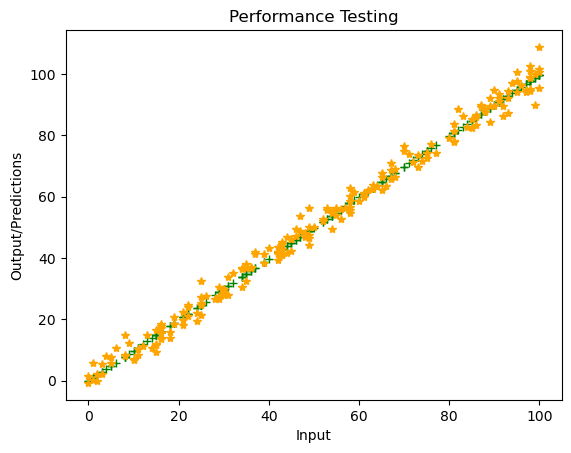

In [20]:
# Test Input vs Predicted Output
plt.plot(test_input,test_predictions,"+",color='green')
# Test Input vs Actual Output
plt.plot(test_input,test_output,"*",color='orange')
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Output/Predictions")
plt.show()

### Cost

In [21]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(test_output,test_predictions)
cost

8.030031591835375